In [29]:
# some default settings for plots 
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

# Create xarray region mask

In [30]:
# Import regionmask and check the version
import regionmask
regionmask.__version__

'0.5.0'

In [31]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
# below: custom color map downloaded from GEOS-Chem python tutorial
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable
from functions import area_latlon # function to compute grid area

In [32]:
# load data
fname = '/home/msadiq/Desktop/co2/data/emission/ODIAC/odiac2019_1x1d_2015.nc'
ds = xr.open_dataset(fname)
#ds

In [33]:
# read in one month of data, [180,360]
dr = ds['intl_bunker'][1,:,:]
#dr

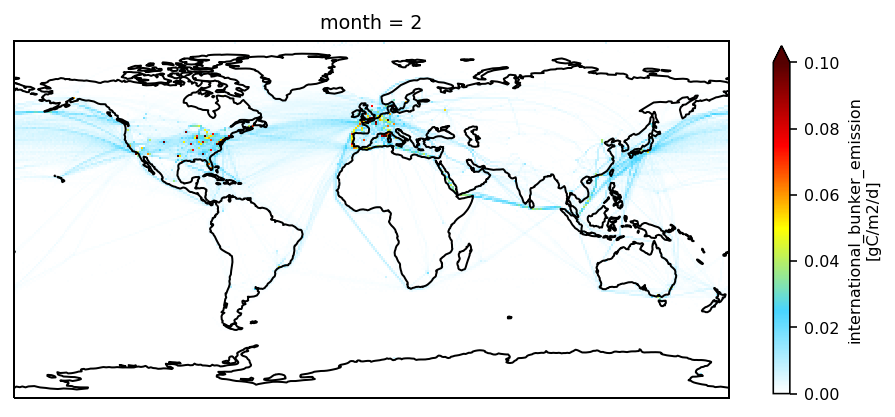

In [34]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)

dr.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 0.1, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.8})

ax.coastlines();

### Making a mask

In [35]:
mask = regionmask.defined_regions.giorgi.mask(dr)

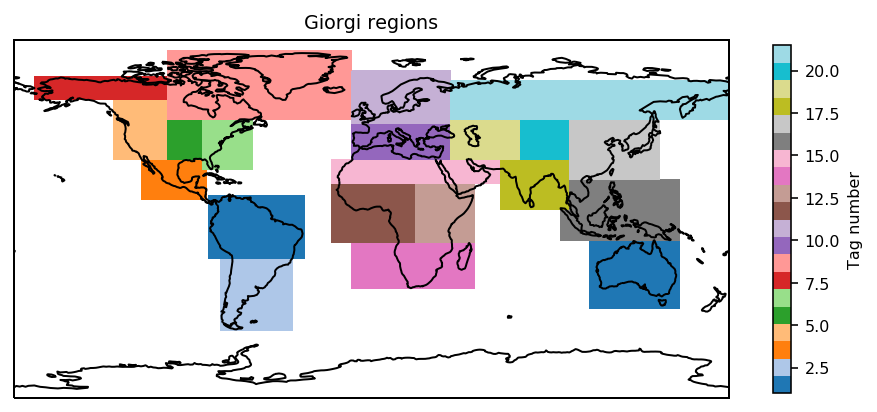

In [36]:
# plot the mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()

mask.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8, 'label': 'Tag number'})
ax.set_title("Giorgi regions")
ax.coastlines();

#fig.savefig('../plots/masks_21tags.png', dpi=300)

In [37]:
# copy attributes from an existing GEOS-Chem mask file
fname = '/home/msadiq/Desktop/co2/data/emission/GC/SE_Asia_mask.generic.1x1.nc'
ds = xr.open_dataset(fname)
#ds
#np.datetime64('2000-01-01')

In [38]:
# create one NetCDF file for one MASK, and save
nm_masks = mask.max().values # number of masks
for count in np.arange(nm_masks)+1:
    target = xr.Dataset({"MASK": (("time", "lat", "lon"), np.zeros(180*360).reshape(1,180,360))},coords=ds.coords)
    target = target.astype(dtype='float32')
    mask_TF = mask == count
    target['MASK'][0,:,:] = mask_TF.where(True)
    target['MASK'].attrs = ds['MASK'].attrs
    target['lon'].attrs = ds['lon'].attrs
    target['lat'].attrs = ds['lat'].attrs
    #print(target)
    target.attrs = ds.attrs
    target.attrs['comment'] = 'giorgi region masks, by m.sadiq 2020'
    target.to_netcdf('/home/msadiq/Desktop/co2/data/emission/GC/MASK' + str(count.astype(int)) + '_giorgi_1x1.nc')

In [39]:
# one more mask, for the rest of the globe
target = xr.Dataset({"MASK": (("time", "lat", "lon"), np.zeros(180*360).reshape(1,180,360))},coords=ds.coords)
target = target.astype(dtype='float32')
mask_nan = np.isnan(mask)
target['MASK'][0,:,:] = mask_nan.where(True)
target['MASK'].attrs = ds['MASK'].attrs
target['lon'].attrs = ds['lon'].attrs
target['lat'].attrs = ds['lat'].attrs
#print(target)
target.attrs = ds.attrs
target.attrs['comment'] = 'giorgi region masks, by m.sadiq 2020'
target.to_netcdf('/home/msadiq/Desktop/co2/data/emission/GC/MASK22_giorgi_1x1.nc')

### end